In [56]:
from api_keys import stock_key
from api_keys import sandbox_key
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
from datetime import datetime

from pprint import pprint #formats json

In [2]:


import pyEX as p
c = p.Client(api_token=sandbox_key, version='sandbox')
#c = p.Client(api_token = stock_key, version = 'stable') when not having to use sandbox


In [76]:
#c = p.Client(api_token=stock_key, version='stable')
stock = ['XOM', 'DIS', 'DRI', 'LUV', 'HLT' ]

sym='XOM'
timeframe='2y'
XOM_df = c.chartDF(symbol=sym, timeframe=timeframe)[['close', 'open', 'high', 'low', 'symbol']]


sym='HLT'
timeframe='2y'
HLT_df = c.chartDF(symbol=sym, timeframe=timeframe)[['close', 'open', 'high', 'low', 'symbol']]

sym='DIS'
timeframe='2y'
DIS_df = c.chartDF(symbol=sym, timeframe=timeframe)[['close', 'open', 'high', 'low', 'symbol']]

sym='DRI'
timeframe='2y'
DRI_df = c.chartDF(symbol=sym, timeframe=timeframe)[['close', 'open', 'high', 'low', 'symbol']]

sym='LUV'
timeframe='2y'
LUV_df = c.chartDF(symbol=sym, timeframe=timeframe)[['close', 'open', 'high', 'low', 'symbol']]


LUV_df

,close,open,high,low,symbol
date,,,,,
2021-04-22,61.94,65.00,66.700,61.4300,LUV
2021-04-21,64.73,59.80,62.630,61.7530,LUV
2021-04-20,61.50,62.44,62.550,59.5800,LUV
2021-04-19,64.59,64.78,64.860,63.2100,LUV
2021-04-16,65.43,66.11,64.510,64.1470,LUV
...,...,...,...,...,...
2019-04-29,55.71,54.39,56.560,53.9700,LUV
2019-04-26,54.59,55.36,56.160,54.0200,LUV
2019-04-25,55.18,54.36,55.796,54.8933,LUV


In [87]:
all_df = pd.concat([LUV_df, DRI_df, HLT_df, XOM_df, DIS_df], axis=0)
all_df = all_df.sort_index()
all_df

,close,open,high,low,symbol
date,,,,,
2019-04-23,136.93,138.57,139.53,134.400,DIS
2019-04-23,121.00,117.06,121.38,121.170,DRI
2019-04-23,91.90,88.87,91.01,89.330,HLT
2019-04-23,53.71,51.93,53.92,53.450,LUV
2019-04-23,86.53,86.57,86.81,85.610,XOM
...,...,...,...,...,...
2021-04-22,130.50,125.76,129.18,125.320,HLT
2021-04-22,56.18,57.44,56.82,57.530,XOM
2021-04-22,187.92,189.38,192.37,185.009,DIS


In [4]:

#pull  specific rows
XOM_days_df = XOM_df.loc[['2020-01-02', '2020-03-16', '2021-03-16']]
DIS_days_df = DIS_df.loc[['2020-01-02', '2020-03-16', '2021-03-16']]
HLT_days_df = HLT_df.loc[['2020-01-02', '2020-03-16', '2021-03-16']]
LUV_days_df = LUV_df.loc[['2020-01-02', '2020-03-16', '2021-03-16']]
DRI_days_df = DRI_df.loc[['2020-01-02', '2020-03-16', '2021-03-16']]

LUV_days_df



,close,open,high,low,symbol
date,,,,,
2020-01-02,57.56,56.41,57.6,54.39,LUV
2020-03-16,38.12,37.00,40.0,35.93,LUV
2021-03-16,61.67,62.45,62.4,62.16,LUV


In [22]:
three_dates_df = pd.concat([DRI_days_df, LUV_days_df, HLT_days_df, XOM_days_df, DIS_days_df], axis=0)
three_dates_df = three_dates_df.sort_index()
three_dates_df



,close,open,high,low,symbol
date,,,,,
2020-01-02,112.33,112.40,116.30,112.7000,DRI
2020-01-02,57.56,56.41,57.60,54.3900,LUV
2020-01-02,112.17,115.57,116.67,112.5700,HLT
2020-01-02,71.90,70.79,72.29,73.1922,XOM
2020-01-02,149.90,145.73,152.50,148.4000,DIS
2020-03-16,49.53,59.31,60.04,48.2000,DRI
2020-03-16,38.12,37.00,40.00,35.9300,LUV
2020-03-16,69.73,71.90,78.57,66.8800,HLT
2020-03-16,35.69,34.70,38.62,34.3600,XOM


In [35]:

Jan_2020 = three_dates_df.iloc[0:5]
March_2020 = three_dates_df.iloc[5:10]
March_2021 = three_dates_df.iloc[10:15]
March_2021
#three_dates_df.iloc[10:15, 1]



,close,open,high,low,symbol
date,,,,,
2021-03-16,146.33,145.28,149.61,145.961,DRI
2021-03-16,61.67,62.45,62.40,62.160,LUV
2021-03-16,128.83,129.12,130.96,129.390,HLT
2021-03-16,59.51,61.46,61.69,60.300,XOM
2021-03-16,198.95,197.30,203.97,199.000,DIS


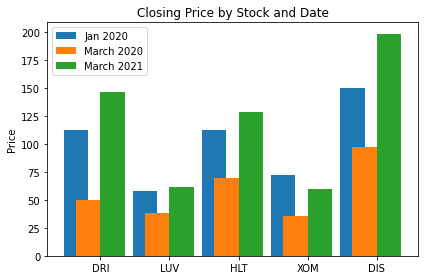

In [57]:


#PLANNING ON USING

labels = three_dates_df["symbol"].unique()

twentytwenty = Jan_2020['close']

march_twentytwenty = March_2020['close']
                
march_twentytwentyone = March_2021['close']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x-width, twentytwenty, width, label='Jan 2020')
rects2 = ax.bar( x - width/2, march_twentytwenty, width, label='March 2020')
rects3 = ax.bar(x + width/2, march_twentytwentyone, width, label = 'March 2021')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Price')
ax.set_title('Closing Price by Stock and Date')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



fig.tight_layout()

plt.show()

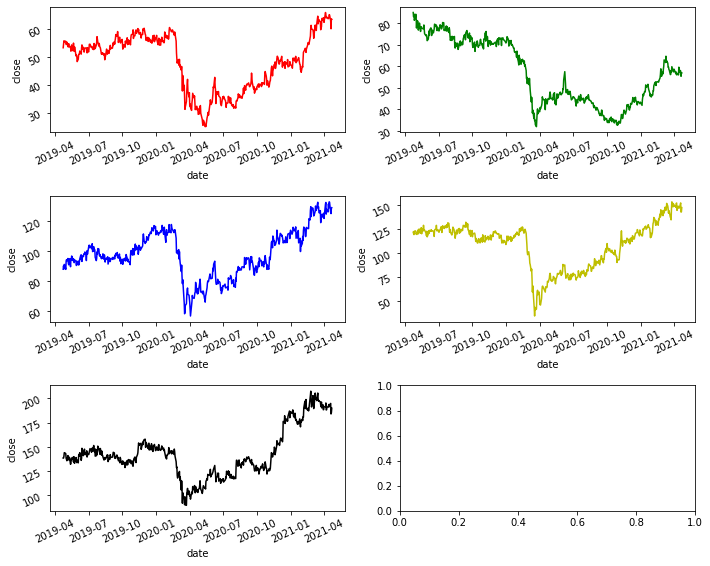

In [68]:
##NOT PLANNING ON USING
# creating data
#unfinished
# create the time series subplots
fig,ax =  plt.subplots( 3, 2,
                       figsize = ( 10, 8))
  
sns.lineplot( x = "date", y = "close", 
             color = 'r', data = LUV_df, 
             ax = ax[0][0])

  
ax[0][0].tick_params(labelrotation = 25)
sns.lineplot( x = "date", y = "close", 
             color = 'g', data = XOM_df,
             ax = ax[0][1])
  
ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x = "date", y = "close",
             color = 'b', data = HLT_df,
             ax = ax[1][0])
  
ax[1][0].tick_params(labelrotation = 25)
  
sns.lineplot(x = "date", y = "close", 
             color = 'y', data = DRI_df, 
             ax = ax[1][1])

ax[1][1].tick_params(labelrotation = 25)
fig.tight_layout(pad = 1.2)


sns.lineplot(x = "date", y = "close", 
             color = 'black', data = DIS_df, 
             ax = ax[2][0])

ax[2][0].tick_params(labelrotation = 25)
fig.tight_layout(pad = 1.2)


In [ ]:
#what percentage did it  drop from Jan to March and then  increase March to March


<AxesSubplot:xlabel='date'>

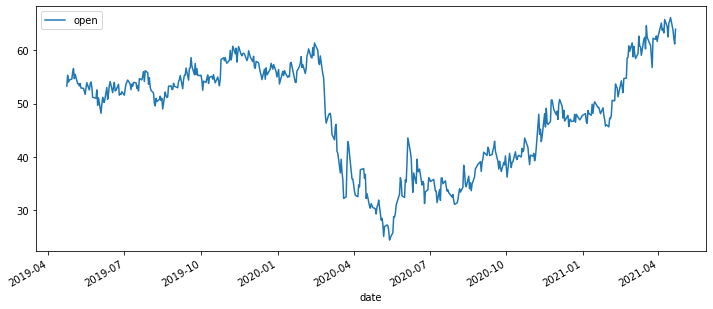

In [69]:
#NOT PLANNING ON USING

LUV_df['open'].plot(legend=True,figsize=(12,5))

<AxesSubplot:xlabel='date'>

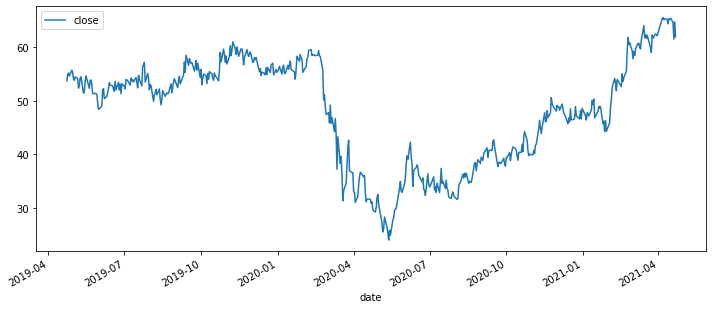

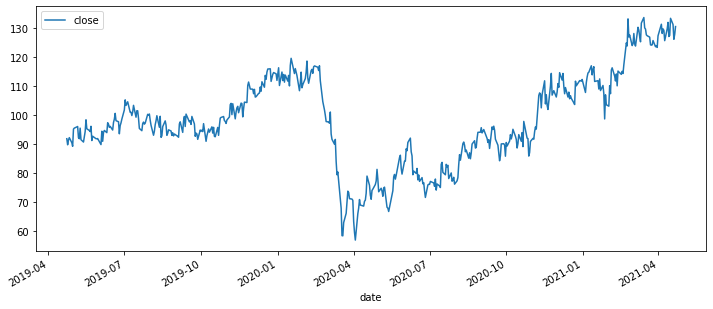

In [79]:
#NOT PLANNING ON USING

LUV_df[['close']].plot(subplots=False,figsize=(12,5))
HLT_df[['close']].plot(subplots=False,figsize=(12,5))



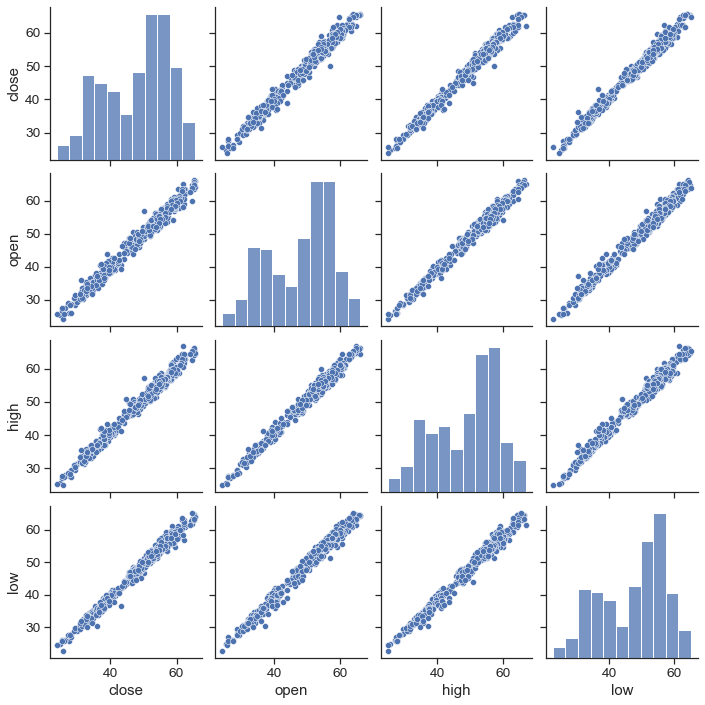

In [88]:
#NOT PLANNING ON USING
sns.set(style = 'ticks', font_scale = 1.25)
sns.pairplot(LUV_df)

C:\Users\weird\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


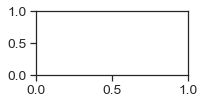

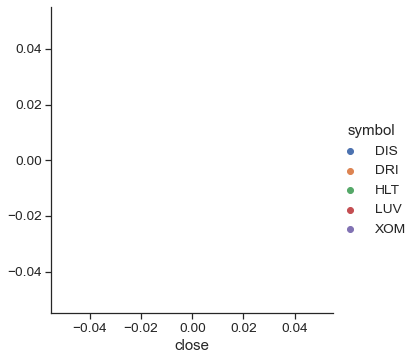

In [97]:
# NOT PLANNING ON USING

#plt.subplot(#total rows, colums, plot number
#plt.subplot(3,2,1)
sns.rel
plot('close', hue = 'symbol', data = all_df)



Text(2020-10-09 00:00:00, 200, 'March 16, 2021')

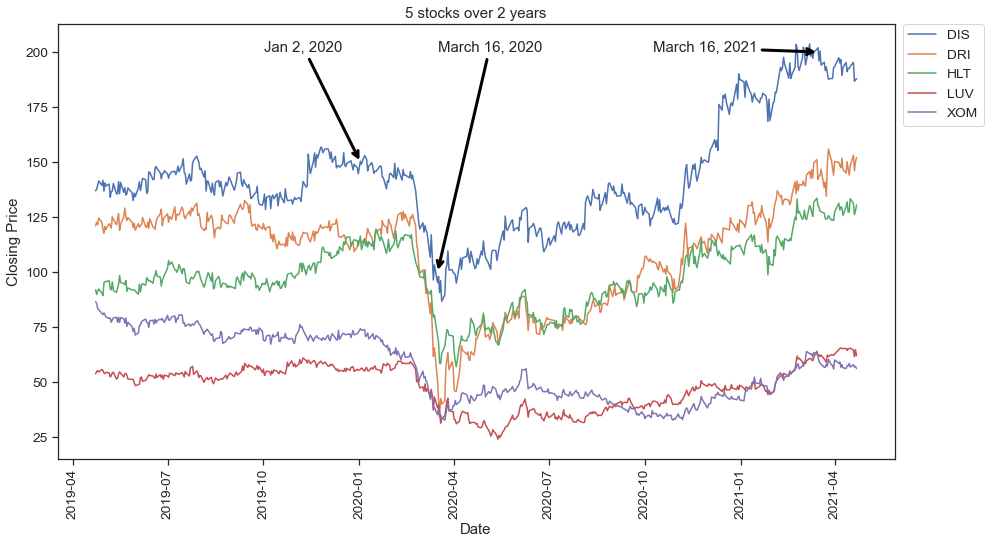

In [169]:
#PLANNING ON USING
fig_dims = (15, 8)

fig, ax = plt.subplots(figsize=fig_dims)
g = sns.lineplot(x="date", 
                 y="close", 
                 data=all_df,
                 hue="symbol")

# Add a title "Average MPG Over Time"
g.set_title('5 stocks over 2 years')
g.set(xlabel = 'Date', ylabel = 'Closing Price')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.xticks(rotation = 90)
ax.annotate("Jan 2, 2020", xy = (pd.Timestamp('2020-01-02'), 150), xytext = (pd.Timestamp('2019-10-02'), 200), 
             arrowprops = {'arrowstyle': '->','linewidth': 3, 'color': 'black'})
ax.annotate("March 16, 2020", xy = (pd.Timestamp('2020-03-16'), 100), xytext = (pd.Timestamp('2020-03-16'), 200),
            arrowprops = {'arrowstyle': '->','linewidth': 3, 'color': 'black'})
ax.annotate("March 16, 2021", xy = (pd.Timestamp('2021-03-16'), 200), xytext = (pd.Timestamp('2020-10-09'), 200), 
            arrowprops = {'arrowstyle': '->', 'linewidth': 3, 'color': 'black'})

#ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext = (pd.Timestamp('2008-10-06'), -.2), 
 #            arrowprops = {'arrowstyle': '->', 'color': 'gray'})


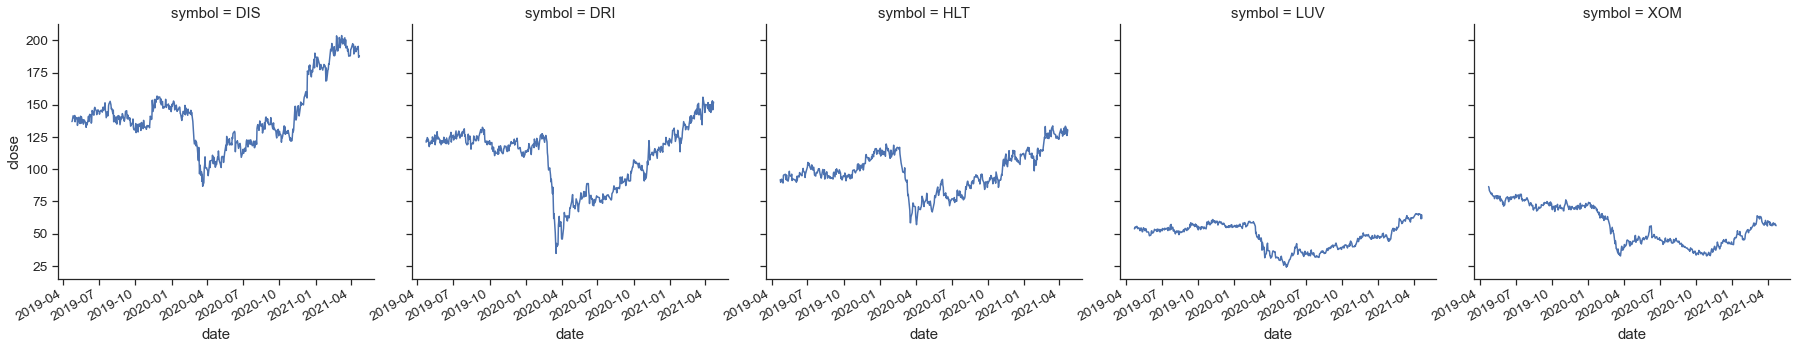

In [180]:
#PLANNING ON USING
g= sns.relplot(x = 'date', y = 'close', data = all_df, kind = "line", col = 'symbol')
g.fig.autofmt_xdate()